In [1]:

import matplotlib.pyplot as plt
import matplotlib.patches as pt


In [2]:

from image import Img
from coordinates import Coordinates, ask_coordinate
from roi import Roi, ask_roi
from recognize import recognize
from rescale import crop, rescale_final_data
from output import output


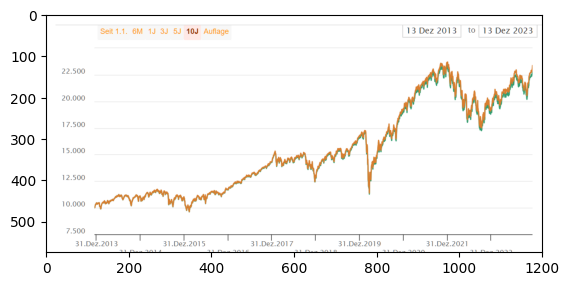

In [3]:
path = r"C:\Users\Benja\Code\Python\PlotDigitizer\data\plot digitizer test.PNG"
#read_image(path)
img = Img(path=path)
img.read_data()


#plot_image()
fig, ax = plt.subplots()
ax.imshow(img.data)
#fig.savefig(r"C:\Users\Benja\Code\Python\PlotDigitizer\data\check\temp.png")
#  noch ein grid mit den coordinaten machen?


In [4]:



coordinates = Coordinates(x1={"pixel": 100,
                              "value": 1}, 
                          x2={"pixel": 1000,
                              "value": 10}, 
                          y1={"pixel": 150,
                              "value": 23500}, 
                          y2={"pixel": 470,
                              "value": 10000}, )



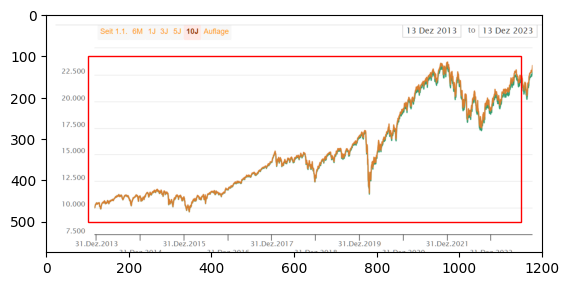

In [5]:


roi = Roi(100, 100, 1050, 400)
rectangle = pt.Rectangle((roi.x,roi.y), roi.width, roi.height, facecolor='None', edgecolor='red')
fig, ax = plt.subplots()
ax.add_patch(rectangle)
ax.imshow(img.data)

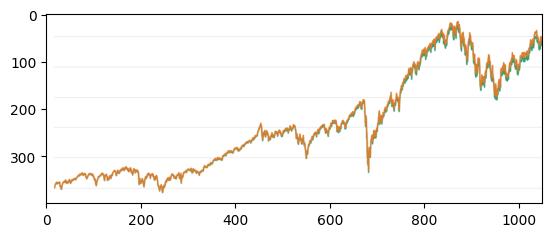

In [6]:

#crop()
crop(img, roi)
fig, ax = plt.subplots()
ax.imshow(img.croped_data)

In [7]:

#recognize_data()
final_data = recognize(img.croped_data)

In [8]:
final_data = rescale_final_data(final_data, coordinates, roi)

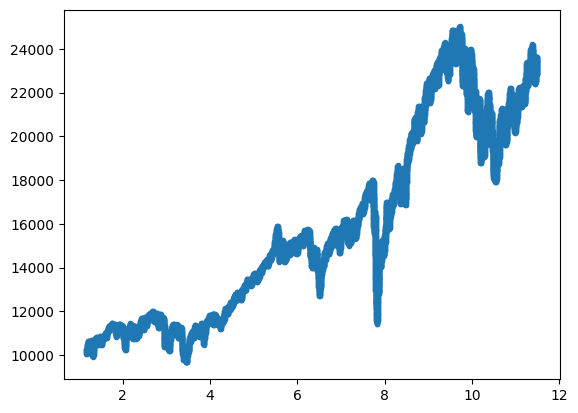

In [9]:
output(final_data)